# Machine Learning - Introduction

This lab provides an introduction to fundamental machine learning concepts using R. It will guide you through the application of the K-Nearest Neighbor (KNN) algorithm to classify the species of iris flowers based on their measured characteristics. 
Through this lab, you will gain hands-on experience in the complete process of building a machine learning model, from data preparation to model evaluation.

## KNN Classification

K-Nearest Neighbors (KNN) is a simple and widely used classification algorithm in machine learning. KNN is primarily used for classification tasks, but it can also be applied to regression problems.

The KNN algorithm makes predictions based on the "k" nearest data points (neighbors) to a given query point. In the context of classification, the algorithm assigns the query point to the class that is most prevalent among its k-nearest neighbors. The value of "k( k=1,2,3 etc.)" is a parameter that needs to be specified before applying the algorithm.

The diagram below provides an overview of the fundamental principles of a KNN classifier. It showcases two features, with one represented on the horizontal axis and the other on the vertical axis. The diagram displays cases belonging to two distinct classes, denoted by red triangles and blue circles. In brief, each case possesses values for the two features, along with an associated class label. The primary objective of the KNN algorithm is to classify cases with unknown labels based on their proximity to existing labeled cases.

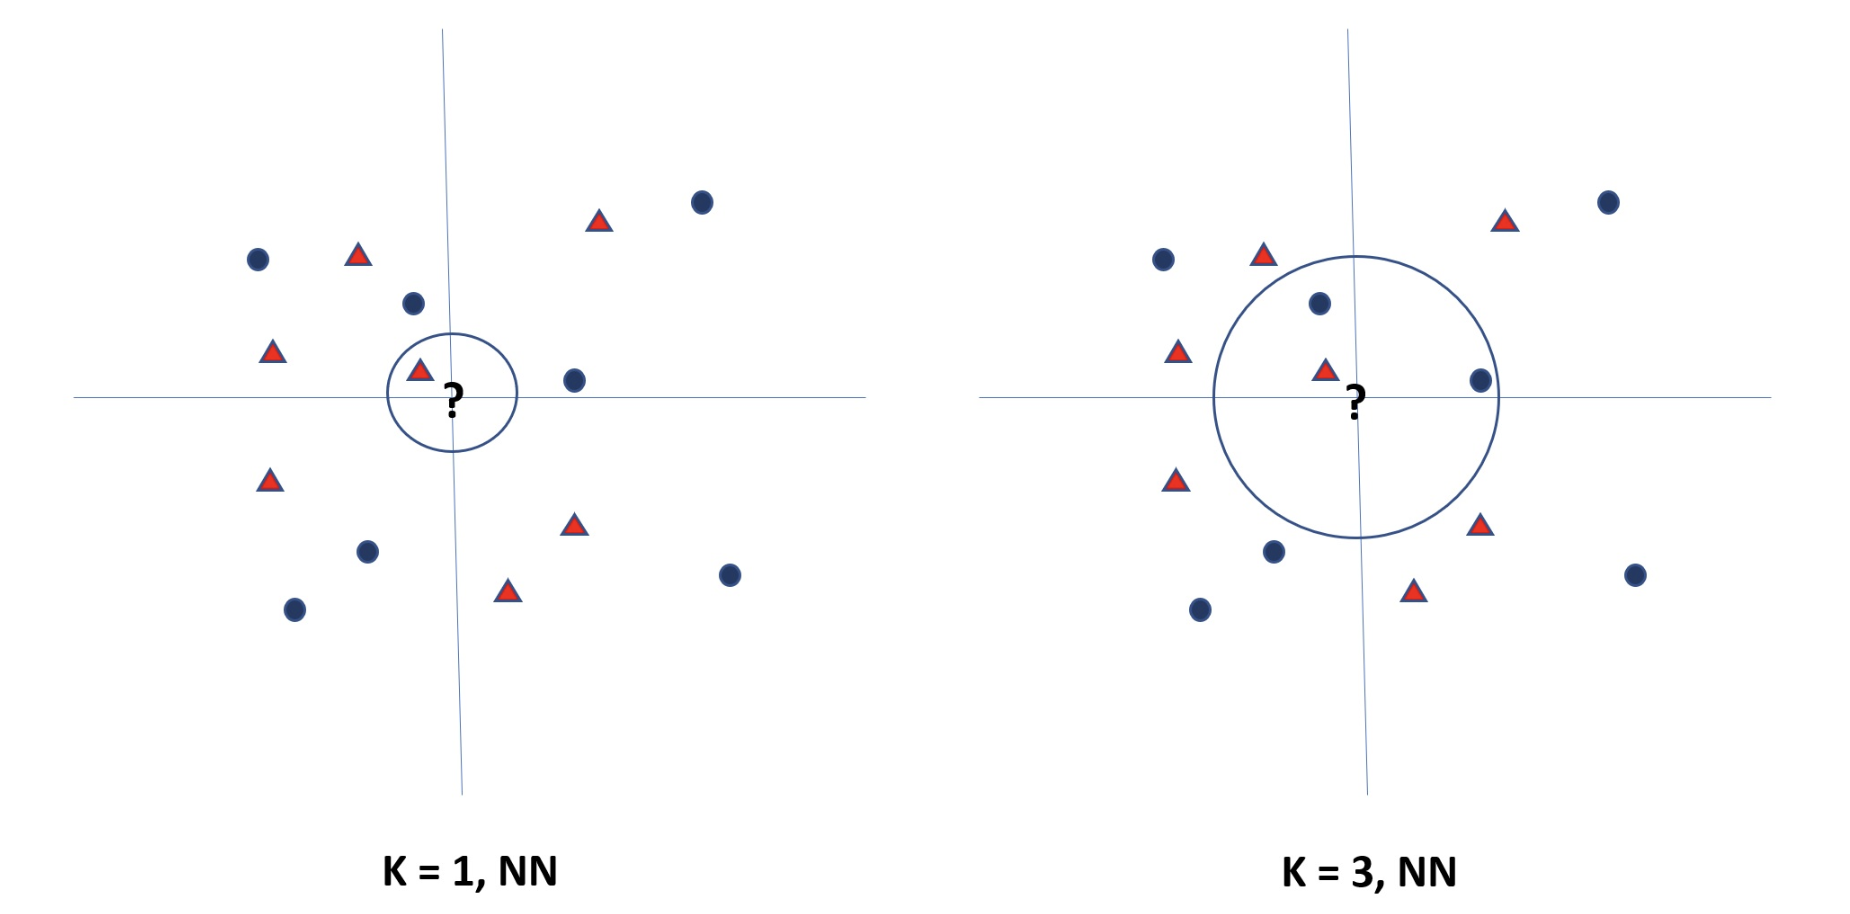

Continuing with the example, the left side of the diagram showing the scenario when K=1. The nearest neighbor to the unknown case, denoted as '?', is a red triangle. Hence, the KNN algorithm classifies the unknown case as a red triangle.

On the right side of the diagram, the K=3 case is shown. Within the circle, there are three nearby neighbors. Among these neighbors, the majority consists of blue circles. Therefore, the algorithm classifies the unknown case, '?', as a blue circle.

It's important to note that as K varies, the class predicted for the unknown case changes accordingly. This characteristic is inherent in the KNN method.

## Working on Data Set

The Iris dataset is a widely-used dataset in the field of machine learning and statistics. It was introduced by the British biologist and statistician, Ronald A. Fisher, in 1936. The dataset contains 150 samples of iris flowers, each belonging to one of three species: Setosa, Versicolor, and Virginica.

Next, you'll load and inspect the dataset. Run the provided code in the cell below to view the initial rows of the data frame.

In [12]:
data(iris) # Load the iris data set
head(iris) # look at the first few rows of the data frame

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


The dataset comprises four features, representing the dimensions of various parts of the iris flower structures. The species of the flower is recorded in the label column. The objective is to develop and evaluate a KNN algorithm to accurately classify the species.

In the next step, you will run the provided code in the cell below to display the data types of each column.

In [13]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


The features in the dataset are numeric, while the label variable, Species, is of categorical type.

Following this, you will analyze the number of unique categories and the count of cases for each category in the Species variable. Execute the provided code in the cell below to observe the outcomes.

In [14]:
table(iris$Species)


    setosa versicolor  virginica 
        50         50         50 

In the dataset, there are three iris species, each having 50 cases.

Next, we will generate plots to observe how well the classes are separated based on the feature values. Ideally, the label classes should be perfectly distinguished by one or more pairs of features.

We have six possible scatter plots of the four features. For the current analysis, we will generate scatter plots for two variable pairs. Run the provided code in the cell below and examine the resulting plots.

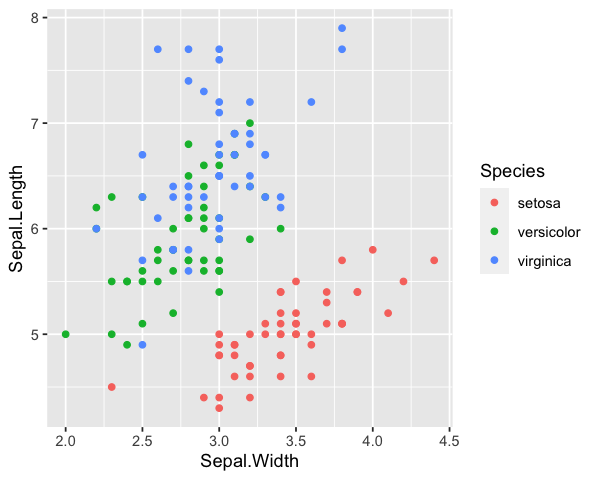

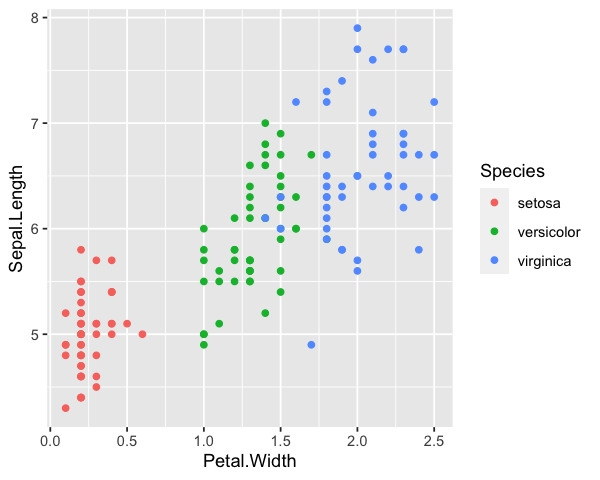

In [15]:
library(ggplot2)
library(repr)
options(repr.plot.width=5, repr.plot.height=4) # Set the initial plot area dimensions

ggplot(iris, aes(Sepal.Width, Sepal.Length)) + geom_point(aes(color = Species))
ggplot(iris, aes(Petal.Width, Sepal.Length)) + geom_point(aes(color = Species))  

## Data Preperation

Data preparation is a crucial step before training any machine learning model. In this case, the data requires two essential preparation steps:

1. Scale the numeric values of the features: It is vital to ensure that numeric features used for training machine learning models have a similar range of values. This avoids any bias towards features with large numeric values, which could dominate the model training process, even if smaller numeric values in other features are more informative. To achieve this, Z-score normalization is employed. This process scales each feature so that it has a mean of 0 and a variance of 1.0.

2. Split the dataset into randomly sampled training and evaluation sets: Randomly selecting cases for the training and evaluation sets helps prevent the leakage of information between these sets. This ensures that the model is evaluated on unseen data, providing a more accurate assessment of its performance.

The code provided in the cell iterates over the numeric feature columns of the data frame and prints a statistical summary of the dataset. To observe the results, please execute the code and review the output.

In [16]:
iris[,c('Sepal.Width', 'Sepal.Length', 'Petal.Width', 'Petal.Length')] = 
    lapply(iris[,c('Sepal.Width', 'Sepal.Length', 'Petal.Width', 'Petal.Length')], scale)
print(summary(iris))
print(sapply(iris[,c('Sepal.Width', 'Sepal.Length', 'Petal.Width', 'Petal.Length')], sd))

   Sepal.Length.V1       Sepal.Width.V1      Petal.Length.V1   
 Min.   :-1.8637803   Min.   :-2.4258204   Min.   :-1.5623422  
 1st Qu.:-0.8976739   1st Qu.:-0.5903951   1st Qu.:-1.2224563  
 Median :-0.0523308   Median :-0.1315388   Median : 0.3353541  
 Mean   : 0.0000000   Mean   : 0.0000000   Mean   : 0.0000000  
 3rd Qu.: 0.6722490   3rd Qu.: 0.5567457   3rd Qu.: 0.7602115  
 Max.   : 2.4836986   Max.   : 3.0804554   Max.   : 1.7798692  
    Petal.Width.V1          Species  
 Min.   :-1.4422448   setosa    :50  
 1st Qu.:-1.1798595   versicolor:50  
 Median : 0.1320673   virginica :50  
 Mean   : 0.0000000                  
 3rd Qu.: 0.7880307                  
 Max.   : 1.7063794                  
 Sepal.Width Sepal.Length  Petal.Width Petal.Length 
           1            1            1            1 


Analyze these resluts. The mean is zero, and the variance is approximately 1.0.

Next, you will divide the dataset into two subsets: a test subset and an evaluation subset. The code in the cell below randomly selects cases and assigns them to either the training or test data frame. Run this code to generate these subsets.

In [17]:
## Split the data into a training and test set by Bernoulli sampling
library(dplyr)
set.seed(2345)
train.iris = sample_frac(iris, 0.7)
test.iris = iris[-as.numeric(rownames(train.iris)),] # use as.numeric because rownames() returns character


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Training and Evaluating KNN Model

With a grasp of the relationships between the features and the label, as well as the data preparation being completed, it is now time to train and evaluate a K=3 model. The code in the cell below performs the following tasks:

1. Defines the model in the R modeling language as "Species ~ .". In simple terms, this formula signifies modeling the label "Species" using all of the other columns (features) in the data frame, denoted by "."

2. Sets the training dataset to the subset created earlier.

3. Sets the test dataset to the subset created earlier. The model's performance will be evaluated based on its prediction accuracy for the labels in this subset.

4. Specifies the value of K as 3.

5. Prints a summary of the model, providing an overview of its key characteristics and performance metrics.

In [18]:
## Compute a k = 3 nearest neighbor model
library(kknn)
knn.3 <- kknn(Species ~ ., train = train.iris, test = test.iris, k=3)
summary(knn.3)


Call:
kknn(formula = Species ~ ., train = train.iris, test = test.iris,     k = 3)

Response: "nominal"
          fit prob.setosa prob.versicolor prob.virginica
1   virginica           0      0.00000000      1.0000000
2   virginica           0      0.38490018      0.6150998
3   virginica           0      0.00000000      1.0000000
4   virginica           0      0.08866211      0.9113379
5   virginica           0      0.00000000      1.0000000
6   virginica           0      0.00000000      1.0000000
7   virginica           0      0.00000000      1.0000000
8   virginica           0      0.00000000      1.0000000
9   virginica           0      0.00000000      1.0000000
10  virginica           0      0.00000000      1.0000000
11  virginica           0      0.00000000      1.0000000
12  virginica           0      0.00000000      1.0000000
13  virginica           0      0.00000000      1.0000000
14  virginica           0      0.00000000      1.0000000
15 versicolor           0      1.0000000

By examining the above summary, you can see the most probable class is the prediction.

Now, run the code in the and examine plots of the classifications of the iris species.

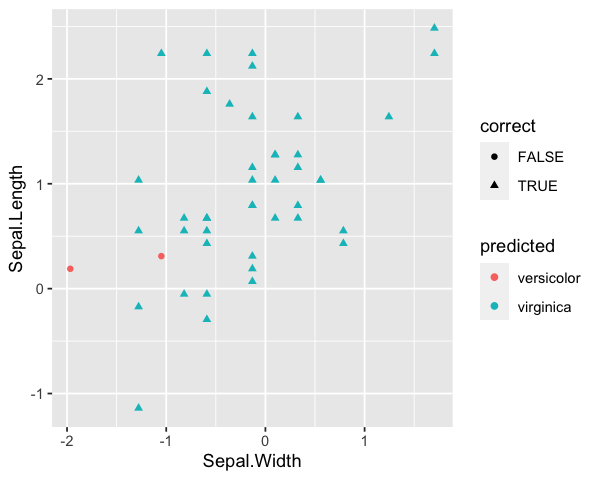

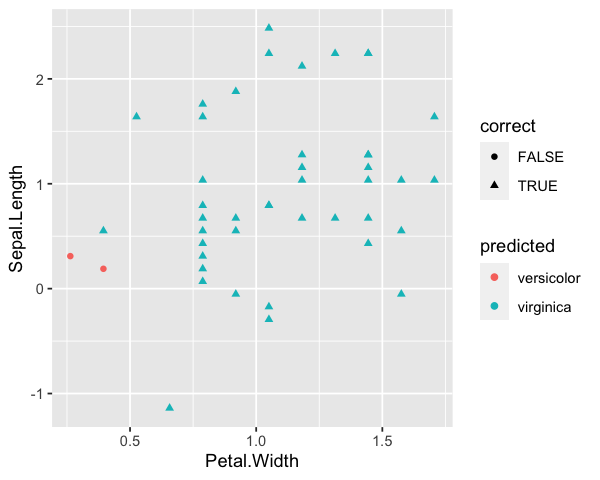

In [29]:
ggplot(test.iris, aes(Sepal.Width, Sepal.Length)) + geom_point(aes(color = predicted, shape = correct))
ggplot(test.iris, aes(Petal.Width, Sepal.Length)) + geom_point(aes(color = predicted, shape = correct)) 

In the plots, color is used to indicate the predicted class. Triangles represent correctly classified cases, while circles represent incorrectly classified cases.

## Summary

Throughout this lab, you have built and assessed a KNN machine learning classification model. Specifically, you accomplished the following:

1. Loaded and explored the data, utilizing visualization techniques to investigate whether the features effectively separate the classes.

2. Prepared the data by normalizing the numeric features and randomly dividing it into training and testing subsets.

3. Constructed and evaluated the machine learning model. Evaluation was carried out both statistically, using the accuracy metric, and through visualization.

In conclusion, this lab allowed you to gain insights into the process of creating and evaluating a KNN classification model, enabling a better understanding of the dataset's characteristics and the model's predictive performance.